In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#1단계: 데이터 준비
df = pd.read_csv("./datas/auto-mpg.csv", header=None)
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
0    398 non-null float64
1    398 non-null int64
2    398 non-null float64
3    398 non-null object
4    398 non-null float64
5    398 non-null float64
6    398 non-null int64
7    398 non-null int64
8    398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


In [3]:
#컬럼 이름 (변수, 특성 이름) 지정
df.columns=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name']

# horsepower열에서 ?를 NaN값으로 대체
df['horsepower'].replace('?', np.nan, inplace=True) 
#horsepower열이 NaN인 행을 삭제
df.dropna(subset=['horsepower'], axis=0, inplace=True)
#문자열 데이터를 실수형 데이터로 변환
df['horsepower'] = df['horsepower'].astype('float')

In [4]:
#3단계 : 분석에 사용할 특성(열, 변수) 선택 (연비, 실린더, 마력, 중력)
ndf = df[[ 'mpg', 'cylinders','horsepower', 'weight' ]]

In [5]:
# 4단계 : 훈련 데이터와 테스트 데이터로 분리
X= ndf[['cylinders', 'horsepower', 'weight']]   #독립변수 X : 무게
Y=ndf['mpg']    #종속변수 Y : 연비

In [15]:
# train data 와 test data를 7:3 비율로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)  #랜덤 추출값 10

In [21]:
from sklearn.linear_model import LinearRegression  #선형회귀 라이브러리의 선형회귀분석 모듈 

lr = LinearRegression()  #단순 선형회귀분석 객체 생성

lr.fit(X_train, Y_train)  #학습 => 모델 생성

r_square = lr.score(X_test, Y_test) # 결정 계수 계산
print(r_square )    #결정 계수 :  

print('기울기 a : ', lr.coef_)
print('절편 b : ', lr.intercept_)

0.6939048496695597
기울기 a :  [-0.60691288 -0.03714088 -0.00522268]
절편 b :  46.41435126963405


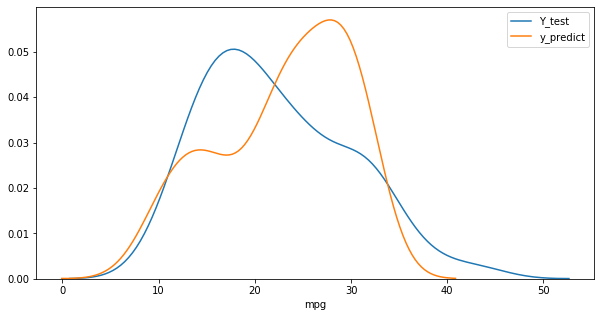

In [22]:
y_predict = lr.predict(X_test) #독립변수에 대한 예측된 종속변수값

plt.figure(figsize=(10,5))
ax1 = sns.distplot(Y_test, hist=False, label='Y_test')
ax2 = sns.distplot(y_predict, hist=False, label='y_predict', ax=ax1)
plt.show()
plt.close()